469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 130ms/step - accuracy: 0.7586 - loss: 0.7269 - val_accuracy: 0.9776 - val_loss: 0.0743


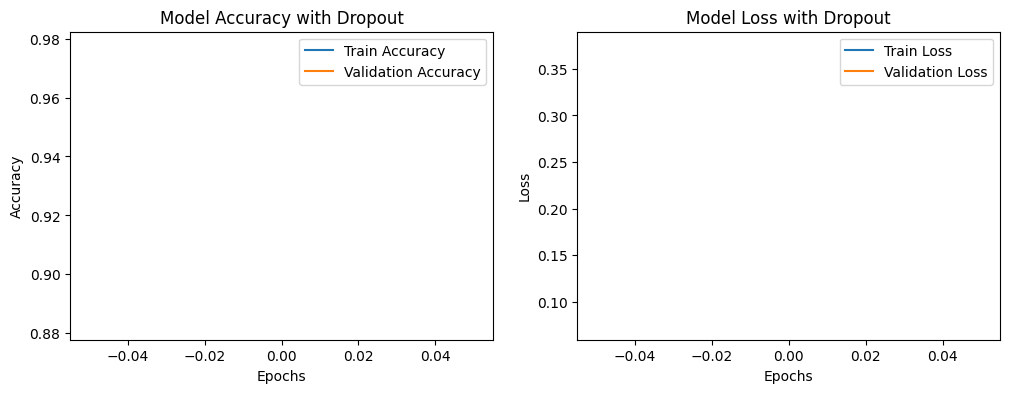

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9734 - loss: 0.0889
Test Accuracy: 0.9776
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Predicted classes: [7 2 1 ... 4 5 6]


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing: Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the CNN model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout layer
model.add(layers.Dropout(0.25))  # Dropout with a rate of 25%

# Convolutional layer 2
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout layer
model.add(layers.Dropout(0.25))  # Dropout with a rate of 25%

# Flatten the data
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))

# Dropout layer before output layer
model.add(layers.Dropout(0.5))  # Dropout with a rate of 50%

# Output layer (softmax for multi-class classification)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN
history = model.fit(X_train, y_train, epochs=1, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = predictions.argmax(axis=1)

# Print predicted classes
print("Predicted classes:", predicted_classes)
